# Prep

Setting up some prior functionality

In [2]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

1.8.0 True


# Load a model

First we have to decide if our model should be pretrained. 

This greatly depends on the size of a dataset. Smaller datasets rely more on finetuning. 

In [3]:
pretrained = True

# Dataset

Our dataset should be loadable as a COCO format

This allows us to use the pycocotools to load the data dict for the main python script

In [4]:
dataset_file = "coco" # alternatively, implement your own coco-type dataset loader in datasets and add this "key" to datasets/__init__.py

dataDir = "final_transformer_dataset/" # should lead to a directory with a train2017 and val2017 folder as well as an annotations folder
num_classes = 5 # this int should be the actual number of classes + 1 (for no class)

outDir = 'outputs/'
resume = "detr-r50_no-class-head.pth" if pretrained else ""
no_epochs = 8
start = 6
learning_rate = 1e-5
batchSize = 2

# Training

We use the main.py script to run our training

In [5]:
!python main.py --dataset_file $dataset_file \
  --coco_path $dataDir \
  --output_dir $outDir \
  --resume $resume \
  --num_classes $num_classes \
  --batch_size $batchSize \
  --lr $learning_rate \
  --lr_backbone 1e-6 \
  --epochs $no_epochs \
  --start_epoch $start

Not using distributed mode

wandb: Currently logged in as: kdlpro (detr-thesis). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.12.16
wandb: Run data is saved locally in C:\Users\kenne\Documents\Final Implementation of DETR\Aivclab-DETR\wandb\run-20220525_141725-2devnfbi
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run still-lion-11
wandb:  View project at https://wandb.ai/detr-thesis/aivclab-detr
wandb:  View run at https://wandb.ai/detr-thesis/aivclab-detr/runs/2devnfbi
fatal: not a git repository (or any of the parent directories): .git
wandb: Waiting for W&B process to finish... (success).
wandb: - 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
wandb: \ 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
wandb: | 0.001 MB of 0.695 MB uploaded (0.000 MB deduped)
wandb: / 0.001 MB of 0.695 MB uploaded (0.000 MB deduped)
wandb: - 0.001 MB of 0.695 MB uploaded (0.000 MB deduped)
wandb: \ 0.001 MB of 0.695 MB uploaded (0.000 MB deduped)
wandb: | 0.001 MB of 0


git:
  sha: N/A, status: clean, branch: N/A

Namespace(aux_loss=True, backbone='resnet50', batch_size=2, bbox_loss_coef=5, clip_max_norm=0.1, coco_panoptic_path=None, coco_path='final_transformer_dataset/', dataset_file='coco', dec_layers=6, device='cuda', dice_loss_coef=1, dilation=False, dim_feedforward=2048, dist_url='env://', distributed=False, dropout=0.1, enc_layers=6, eos_coef=0.1, epochs=8, eval=False, frozen_weights=None, giou_loss_coef=2, hidden_dim=256, lr=1e-05, lr_backbone=1e-06, lr_drop=200, mask_loss_coef=1, masks=False, nheads=8, num_classes=5, num_queries=100, num_workers=2, output_dir='outputs/', position_embedding='sine', pre_norm=False, remove_difficult=False, resume='checkpoint-3.pth', seed=42, set_cost_bbox=5, set_cost_class=1, set_cost_giou=2, start_epoch=6, weight_decay=0.0001, world_size=1)
Building a DETR model with 5 classes
number of params: 41280266
loading annotations into memory...
Done (t=0.41s)
creating index...
index created!
loading annotations into 

In [6]:
eval_file = "outputs/checkpoint.pth"


Epoch: [6]  [1720/1877]  eta: 0:02:05  lr: 0.000010  class_error: 60.00  loss: 8.0302 (8.4208)  loss_ce: 0.6417 (0.6707)  loss_bbox: 0.3673 (0.3921)  loss_giou: 0.2546 (0.2993)  loss_ce_0: 0.7053 (0.7047)  loss_bbox_0: 0.4173 (0.4491)  loss_giou_0: 0.3115 (0.3421)  loss_ce_1: 0.7027 (0.6979)  loss_bbox_1: 0.3846 (0.4147)  loss_giou_1: 0.2741 (0.3149)  loss_ce_2: 0.7134 (0.6854)  loss_bbox_2: 0.3726 (0.4027)  loss_giou_2: 0.2637 (0.3068)  loss_ce_3: 0.6494 (0.6785)  loss_bbox_3: 0.3400 (0.3953)  loss_giou_3: 0.2437 (0.2999)  loss_ce_4: 0.6467 (0.6725)  loss_bbox_4: 0.3487 (0.3945)  loss_giou_4: 0.2629 (0.2999)  loss_ce_unscaled: 0.6417 (0.6707)  class_error_unscaled: 83.3333 (77.3310)  loss_bbox_unscaled: 0.0735 (0.0784)  loss_giou_unscaled: 0.1273 (0.1496)  cardinality_error_unscaled: 3.5000 (5.2638)  loss_ce_0_unscaled: 0.7053 (0.7047)  loss_bbox_0_unscaled: 0.0835 (0.0898)  loss_giou_0_unscaled: 0.1557 (0.1711)  cardinality_error_0_unscaled: 3.0000 (4.1267)  loss_ce_1_unscaled: 0.70

In [7]:
!python main.py --dataset_file $dataset_file \
  --eval \
  --coco_path $dataDir \
  --output_dir $outDir \
  --resume $eval_file \
  --num_classes $num_classes \
  --batch_size $batchSize \
  --lr $learning_rate \
  --lr_backbone 1e-6 \
  --epochs $no_epochs 

Not using distributed mode
git:
  sha: N/A, status: clean, branch: N/A

Namespace(aux_loss=True, backbone='resnet50', batch_size=2, bbox_loss_coef=5, clip_max_norm=0.1, coco_panoptic_path=None, coco_path='final_transformer_dataset/', dataset_file='coco', dec_layers=6, device='cuda', dice_loss_coef=1, dilation=False, dim_feedforward=2048, dist_url='env://', distributed=False, dropout=0.1, enc_layers=6, eos_coef=0.1, epochs=8, eval=True, frozen_weights=None, giou_loss_coef=2, hidden_dim=256, lr=1e-05, lr_backbone=1e-06, lr_drop=200, mask_loss_coef=1, masks=False, nheads=8, num_classes=5, num_queries=100, num_workers=2, output_dir='outputs/', position_embedding='sine', pre_norm=False, remove_difficult=False, resume='outputs/checkpoint.pth', seed=42, set_cost_bbox=5, set_cost_class=1, set_cost_giou=2, start_epoch=0, weight_decay=0.0001, world_size=1)
Building a DETR model with 5 classes
number of params: 41280266
loading annotations into memory...
Done (t=0.22s)
creating index...
index cre

wandb: Currently logged in as: kdlpro (detr-thesis). Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.12.16
wandb: Run data is saved locally in C:\Users\kenne\Documents\Final Implementation of DETR\Aivclab-DETR\wandb\run-20220525_145540-3cmb7ygj
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run dauntless-firefly-12
wandb:  View project at https://wandb.ai/detr-thesis/aivclab-detr
wandb:  View run at https://wandb.ai/detr-thesis/aivclab-detr/runs/3cmb7ygj
fatal: not a git repository (or any of the parent directories): .git
wandb: Waiting for W&B process to finish... (success).
wandb: - 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
wandb: \ 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
wandb: | 0.001 MB of 0.001 MB uploaded (0.000 MB deduped)
wandb: / 0.001 MB of 0.051 MB uploaded (0.000 MB deduped)
wandb: - 0.001 MB of 0.051 MB uploaded (0.000 MB deduped)
wandb: \ 0.001 MB of 0.051 MB uploaded (0.000 MB deduped)
wandb: | 0.001 

# Results

Quick and easy overview of the training results

In [8]:
from util.plot_utils import plot_logs

from pathlib import Path

log_directory = [Path("outputs/")]

C:\Users\kenne\Documents\Final Implementation of DETR\Aivclab-DETR\util\plot_utils.py:65: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['test_coco_eval_bbox'], dtype='object')
  df.interpolate().ewm(com=ewm_col).mean().plot(


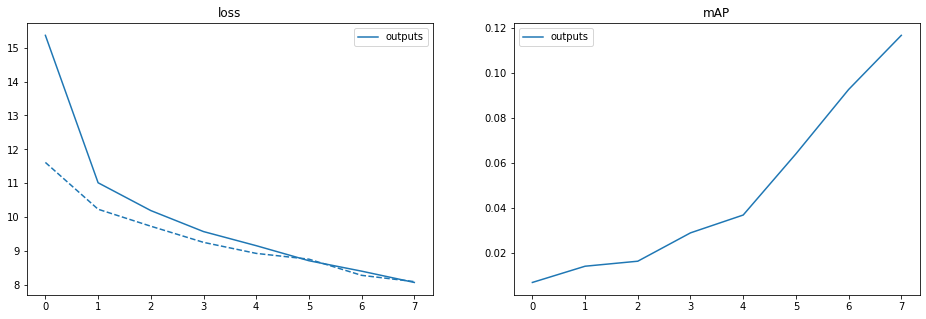

In [9]:
fields_of_interest = (
    'loss',
    'mAP',
    )

plot_logs(log_directory,
          fields_of_interest)

C:\Users\kenne\Documents\Final Implementation of DETR\Aivclab-DETR\util\plot_utils.py:65: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['test_coco_eval_bbox'], dtype='object')
  df.interpolate().ewm(com=ewm_col).mean().plot(
C:\Users\kenne\Documents\Final Implementation of DETR\Aivclab-DETR\util\plot_utils.py:65: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['test_coco_eval_bbox'], dtype='object')
  df.interpolate().ewm(com=ewm_col).mean().plot(
C:\Users\kenne\Documents\Final Implementation of DETR\Aivclab-DETR\util\plot_utils.py:65: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. 

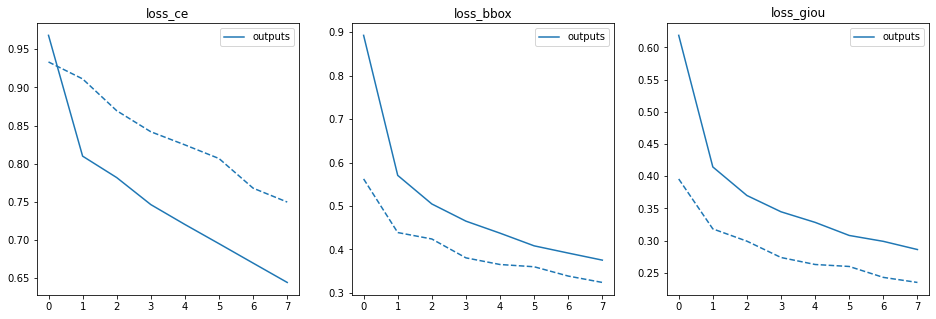

In [10]:
fields_of_interest = (
    'loss_ce',
    'loss_bbox',
    'loss_giou',
    )

plot_logs(log_directory,
          fields_of_interest)

C:\Users\kenne\Documents\Final Implementation of DETR\Aivclab-DETR\util\plot_utils.py:65: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['test_coco_eval_bbox'], dtype='object')
  df.interpolate().ewm(com=ewm_col).mean().plot(
C:\Users\kenne\Documents\Final Implementation of DETR\Aivclab-DETR\util\plot_utils.py:65: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['test_coco_eval_bbox'], dtype='object')
  df.interpolate().ewm(com=ewm_col).mean().plot(


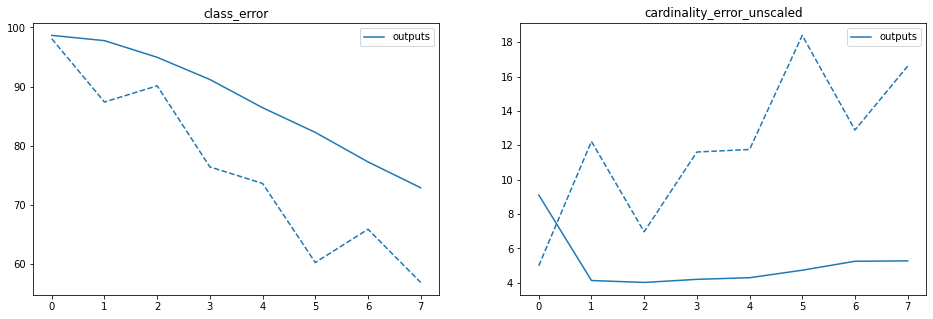

In [11]:
fields_of_interest = (
    'class_error',
    'cardinality_error_unscaled',
    )

plot_logs(log_directory,
          fields_of_interest)   